# Gradient Boosting with CatBoost

This notebook is advanced.

We used the python sklearn package for all our samples.
sklearn is beginner friendly, has a good pipeline concept and provides a lot of models.

Here we use CatBoost. CatBoost is another python package, that specialises on Gradient Boosting.

The CatBoost package provides the CatBoostReegressor that can be combined with the sklearn Pipelines.

Additionally, we use extra data found on the internet to add extra features based on the original zipcode feature.
https://www.bfs.admin.ch/bfs/de/home/statistiken/regionalstatistik/regionale-portraets-kennzahlen/gemeinden.assetdetail.7786544.html

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.compose import TransformedTargetRegressor
from catboost import CatBoostRegressor

## Helper functions

In [2]:
def evaluate_model(model, X, y):
    # Predict with the model the validation data.
    y_pred = model.predict(X)

    # How good are we on the validation data?
    print(mean_absolute_percentage_error(y, y_pred))

# prepare data

In [3]:
town_data = pd.read_csv('../data/town_data.csv', header=[1])
town_data = town_data.replace('*', np.nan)
town_data = town_data.replace('X', np.nan)

In [4]:
town_data.head()

,Gemeindename,Einwohner,Veränderung in %,Bevölkerungs-dichte pro km²,Ausländer in %,0-19 Jahre,20-64 Jahre,65 Jahre und mehr,Rohe Heiratssziffer,Rohe Scheidungsziffer,...,FDP 3),CVP,SP,SVP,EVP/CSP,GLP,BDP,PdA/Sol.,GPS,Kleine Rechtsparteien
0,Aeugst am Albis,1941,6.4,245,12.7,19.6,62.5,17.9,5.1,2.0,...,18.7,2.1,18.6,30.9,3.5,8.4,2.6,0.2,7.1,4.9
1,Affoltern am Albis,12146,9.5,1147,28.6,20.8,61.4,17.8,5.9,2.7,...,14.2,4.6,19.1,33.8,5.5,7.4,4.2,0.2,6.2,1.8
2,Bonstetten,5512,6.8,742,15.5,23.8,60.4,15.8,4.0,1.3,...,16.5,3.4,20.4,29.1,3.1,11.9,3.8,0.1,6.7,1.9
3,Hausen am Albis,3664,9.0,269,15.1,22.7,60.1,17.2,4.4,1.4,...,12.8,2.9,19.4,34.9,2.6,8.7,4.7,0.2,8.0,1.8
4,Hedingen,3694,8.3,566,15.2,22.4,61.6,16.0,4.3,1.9,...,15.8,3.9,22.5,30.1,3.6,9.6,3.8,0.2,6.5,1.8


In [5]:
town_data.columns

Index(['Gemeindename', 'Einwohner', 'Veränderung in %',
       'Bevölkerungs-dichte pro km²', 'Ausländer in %', '0-19 Jahre',
       '20-64 Jahre', '65 Jahre und mehr', 'Rohe Heiratssziffer',
       'Rohe Scheidungsziffer', 'Rohe Geburtenziffer', 'Rohe Sterbeziffer',
       'Anzahl Privathaushalte',
       'Durchschnittliche Haushaltsgrösse in Personen', 'Gesamtfläche in km²',
       'Siedlungsfläche in %', 'Veränderung in ha',
       'Landwirtschafts-fläche in %', 'Veränderung in ha.1',
       'Wald und Gehölze in %', 'Unproduktive Fläche in %',
       'Beschäftigte total', 'im 1. Sektor', 'im 2. Sektor', 'im 3. Sektor',
       'Arbeitsstätten total', 'im 1. Sektor.1', 'im 2. Sektor.1',
       'im 3. Sektor.1', 'Leerwohnungs-ziffer',
       'Neu gebaute Wohnungen pro 1000 Einwohner', 'Sozialhilfequote',
       'FDP 3)', 'CVP', 'SP', 'SVP', 'EVP/CSP', 'GLP', 'BDP', 'PdA/Sol.',
       'GPS', 'Kleine Rechtsparteien'],
      dtype='object')

In [6]:
train_data = pd.read_csv('../data/houses_train.csv', index_col=0)

In [7]:
train_data = train_data.join(town_data.set_index('Gemeindename'), on='municipality_name')

In [8]:
train_data = train_data.fillna(-1)

In [9]:
X_data = train_data.drop(columns='price')
y_data = train_data['price']

In [10]:
X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, stratify=X_data['object_type_name'], test_size=0.1)

# define and train model

In [32]:
model = Pipeline([
    ('reg', CatBoostRegressor(
        iterations=1000,
        eval_metric='MAPE',
        cat_features=['zipcode', 'municipality_name', 'object_type_name'],
    ))
])

model.fit(X_train, y_train)

Learning rate set to 0.009967
0:	learn: 0.5140269	total: 15.1ms	remaining: 2m 31s
1:	learn: 0.5114024	total: 30.3ms	remaining: 2m 31s
2:	learn: 0.5088959	total: 42ms	remaining: 2m 19s
3:	learn: 0.5064537	total: 51.3ms	remaining: 2m 8s
4:	learn: 0.5038747	total: 61.1ms	remaining: 2m 2s
5:	learn: 0.5015727	total: 69.9ms	remaining: 1m 56s
6:	learn: 0.4991641	total: 79.1ms	remaining: 1m 52s
7:	learn: 0.4967431	total: 85.8ms	remaining: 1m 47s
8:	learn: 0.4943913	total: 94.4ms	remaining: 1m 44s
9:	learn: 0.4922018	total: 102ms	remaining: 1m 41s
10:	learn: 0.4899415	total: 109ms	remaining: 1m 39s
11:	learn: 0.4876339	total: 117ms	remaining: 1m 37s
12:	learn: 0.4853257	total: 126ms	remaining: 1m 37s
13:	learn: 0.4831006	total: 134ms	remaining: 1m 35s
14:	learn: 0.4810674	total: 143ms	remaining: 1m 35s
15:	learn: 0.4788456	total: 150ms	remaining: 1m 33s
16:	learn: 0.4767826	total: 158ms	remaining: 1m 32s
17:	learn: 0.4746821	total: 165ms	remaining: 1m 31s
18:	learn: 0.4726430	total: 174ms	remai

Pipeline(steps=[('reg',
                 <catboost.core.CatBoostRegressor object at 0x13a86d180>)])

In [33]:
evaluate_model(model, X_val, y_val)

0.1836606044212889


# Feature importance

In [13]:
feature_importance = pd.DataFrame({
    'column': X_train.columns, 
    'importance': model['reg'].feature_importances_
})
feature_importance.sort_values('importance', ascending=False)

,column,importance
6,living_area,31.253676
3,municipality_name,6.924567
4,build_year,6.022259
10,travel_time_public_transport,5.471269
49,FDP 3),4.294342
1,long,4.093081
7,num_rooms,3.492522
9,travel_time_private_transport,2.703775
45,im 3. Sektor.1,2.620578
5,object_type_name,2.499262


# Transform target with log

In [24]:
model = Pipeline([
    (
        'reg', TransformedTargetRegressor(
            regressor=CatBoostRegressor(
                verbose=False,
                eval_metric='MAPE',
                cat_features=['zipcode', 'municipality_name', 'object_type_name']
            ),
            func=np.log,
            inverse_func=np.exp
        )
    )
])
_ = model.fit(X_train, y_train)

In [25]:
evaluate_model(model, X_val, y_val)

0.17364412959811554


## Retrain model on full dataset

In [26]:
_ = model.fit(X_data, y_data)

# Predict prices for test set

In [27]:
# Load the test set
test_data = pd.read_csv('../data/houses_test.csv', index_col=0)
test_data = test_data.join(town_data.set_index('Gemeindename'), on='municipality_name')
test_data = test_data.fillna(-1)

In [28]:
# Split data into features and labels.
X_test = test_data.drop(columns='price')
y_test = test_data['price']

In [29]:
# Predict with the model the test data.
y_test_pred = model.predict(X_test)

In [30]:
# How good are we on the test data?
print(mean_absolute_percentage_error(y_test, y_test_pred))

0.1714156366695058


## Learning Curve

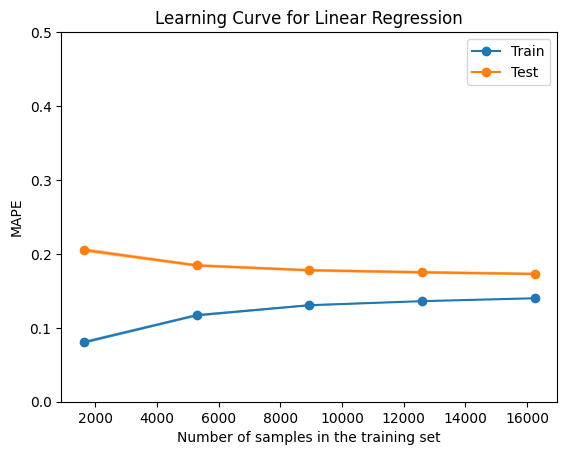

In [31]:
import matplotlib.pyplot as plt
from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit

common_params = {
    "X": X_data,
    "y": y_data,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=5, test_size=0.2, random_state=42),
    "score_type": "both",
    "n_jobs": -1,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "MAPE",
}

lcd = LearningCurveDisplay.from_estimator(model, **common_params, scoring='neg_mean_absolute_percentage_error', negate_score=True)
lcd.ax_.set_ylim(ymin=0.00, ymax=0.5)
plt.title("Learning Curve for Linear Regression")
plt.show()